In [216]:
"""METHOD 2 OF DATASET CREATION

import os
import shutil
import random

# Specify the path to the source dataset directory
source_dir = "../celeba_dataset/img_align_celeba"

# Specify the path to the destination directory
destination_dir = "../celeba_dataset/celeb_faces_real"

# Number of images to randomly select and copy
num_images_to_copy = 400

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# List all image files in the source directory
image_files = os.listdir(source_dir)

# Randomly select images
selected_images = random.sample(image_files, num_images_to_copy)

# Copy selected images to the destination directory
for image in selected_images:
    src_path = os.path.join(source_dir, image)
    dst_path = os.path.join(destination_dir, image)
    shutil.copy(src_path, dst_path)

print(f"Selected and copied {num_images_to_copy} random images to the destination directory.")

dataset = keras.utils.image_dataset_from_directory(
    "../celeb_faces_real", label_mode=None, image_size=(64, 64), batch_size=32
)
dataset = dataset.map(lambda x: x / 255.0)

image_path = "../celeb_faces_real/000049.jpg"

# Open the image using PIL
img = Image.open(image_path)

# Get the size (dimensions) of the image
width, height = img.size
print(width, height)

for x in dataset:
    plt.axis("off")
    plt.imshow((x.numpy() * 255).astype("int32")[0])
    break
    
"""


'METHOD 2 OF DATASET CREATION\n\nimport os\nimport shutil\nimport random\n\n# Specify the path to the source dataset directory\nsource_dir = "../celeba_dataset/img_align_celeba"\n\n# Specify the path to the destination directory\ndestination_dir = "../celeba_dataset/celeb_faces_real"\n\n# Number of images to randomly select and copy\nnum_images_to_copy = 400\n\n# Create the destination directory if it doesn\'t exist\nos.makedirs(destination_dir, exist_ok=True)\n\n# List all image files in the source directory\nimage_files = os.listdir(source_dir)\n\n# Randomly select images\nselected_images = random.sample(image_files, num_images_to_copy)\n\n# Copy selected images to the destination directory\nfor image in selected_images:\n    src_path = os.path.join(source_dir, image)\n    dst_path = os.path.join(destination_dir, image)\n    shutil.copy(src_path, dst_path)\n\nprint(f"Selected and copied {num_images_to_copy} random images to the destination directory.")\n\ndataset = keras.utils.image_

In [217]:
"""discriminator = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)
discriminator.summary()

latent_dim = 128

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(8 * 8 * 128),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ],
    name="generator",
)
generator.summary()

class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]
        
    class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = keras.utils.array_to_img(generated_images[i])
            img.save("generated_img_%03d_%d.png" % (epoch, i))
        

"""

'discriminator = keras.Sequential(\n    [\n        keras.Input(shape=(64, 64, 3)),\n        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),\n        layers.LeakyReLU(alpha=0.2),\n        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),\n        layers.LeakyReLU(alpha=0.2),\n        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),\n        layers.LeakyReLU(alpha=0.2),\n        layers.Flatten(),\n        layers.Dropout(0.2),\n        layers.Dense(1, activation="sigmoid"),\n    ],\n    name="discriminator",\n)\ndiscriminator.summary()\n\nlatent_dim = 128\n\ngenerator = keras.Sequential(\n    [\n        keras.Input(shape=(latent_dim,)),\n        layers.Dense(8 * 8 * 128),\n        layers.Reshape((8, 8, 128)),\n        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),\n        layers.LeakyReLU(alpha=0.2),\n        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),\n        layers.LeakyReLU(alpha=0.2),\n        l

In [79]:
"""class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128,  image_size=(178, 218)):
        self.num_img = num_img
        self.latent_dim = latent_dim
        self.image_size = image_size

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = keras.utils.array_to_img(generated_images[i])
            img = img.resize(self.image_size)
            img.save("generated_img_%03d_%d.png" % (epoch, i))
            def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Decode them to fake images
        generated_images = self.generator(random_latent_vectors)

        # Combine them with real images
        combined_images = tf.concat([generated_images, real_images], axis=0)

        # Assemble labels discriminating real from fake images
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )
        # Add random noise to the labels - important trick!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
            epochs = 30  # In practice, use ~100 epochs

gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

gan.fit(
    dataset, epochs=epochs, callbacks=[GANMonitor(num_img=20, latent_dim=latent_dim)]
)
        }
        
        

# Specify the folder path where the generated_img.png files are located
folder_path = "./"
        #print(f"Deleted {file_path}")"""



______________________

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
#from keras_vggface.vggface import VGGFace
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator

2023-09-17 21:05:59.000067: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### DATASET CREATION

The below code is written to organize a dataset of face images into training and validation sets. My goal is to split the dataset with an 80/20 ratio.
I've defined source and destination directories for my dataset.
To ensure randomness in the split, I've shuffled the list of files.
Then, I've separated the shuffled list of files into two sets: one for training and one for validation, based on the calculated split index.
I've copied the files from the source directory to their respective training and validation directories.

In [118]:
import os
import random
from shutil import copyfile


source_dir = '../dataset/face_dataset/face_real'  
train_dir = '../dataset/face_dataset/train/face_real'  
val_dir = '../dataset/face_dataset/validation/face_real'

# Define the split ratio (e.g., 80% for training, 20% for validation)
split_ratio = 0.8

# Create destination directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# List all files in the source directory (assuming all files are images)
files = os.listdir(source_dir)

# Shuffle the list of files randomly
random.shuffle(files)

# Calculate the split index
split_index = int(len(files) * split_ratio)

# Split the files into training and validation sets
train_files = files[:split_index]
val_files = files[split_index:]

# Copy the files to the respective directories
for file in train_files:
    src = os.path.join(source_dir, file)
    dst = os.path.join(train_dir, file)
    copyfile(src, dst)

for file in val_files:
    src = os.path.join(source_dir, file)
    dst = os.path.join(val_dir, file)
    copyfile(src, dst)

print(f"Total files: {len(files)}, Training files: {len(train_files)}, Validation files: {len(val_files)}")


Total files: 1081, Training files: 864, Validation files: 217


In [119]:
import os
import random
from shutil import copyfile


source_dir = '../dataset/face_dataset/face_fake'  
train_dir = '../dataset/face_dataset/train/face_fake'  
val_dir = '../dataset/face_dataset/validation/face_fake'

# Define the split ratio (e.g., 80% for training, 20% for validation)
split_ratio = 0.8

# Create destination directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# List all files in the source directory (assuming all files are images)
files = os.listdir(source_dir)

# Shuffle the list of files randomly
random.shuffle(files)

# Calculate the split index
split_index = int(len(files) * split_ratio)

# Split the files into training and validation sets
train_files = files[:split_index]
val_files = files[split_index:]

# Copy the files to the respective directories
for file in train_files:
    src = os.path.join(source_dir, file)
    dst = os.path.join(train_dir, file)
    copyfile(src, dst)

for file in val_files:
    src = os.path.join(source_dir, file)
    dst = os.path.join(val_dir, file)
    copyfile(src, dst)

print(f"Total files: {len(files)}, Training files: {len(train_files)}, Validation files: {len(val_files)}")


Total files: 960, Training files: 768, Validation files: 192


In [24]:
data_with_aug = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=True,
                                   rescale=1./255,
                                  validation_split=0.2)
train = data_with_aug.flow_from_directory("../dataset/face_dataset/train/",
                                          class_mode="binary",
                                          target_size=(224, 224),
                                          batch_size=64)

val = data_with_aug.flow_from_directory("../dataset/face_dataset/validation/",
                                          class_mode="binary",
                                          target_size=(224, 224),
                                          batch_size=64)
test = data_with_aug.flow_from_directory("../dataset/face_dataset/test/",
                                          class_mode="binary",
                                          target_size=(224, 224),
                                          batch_size=64)
real_test = data_with_aug.flow_from_directory("../rd_test_dataset/",
                                          class_mode="binary",
                                          target_size=(224, 224),
                                          batch_size=64)

Found 1632 images belonging to 2 classes.
Found 409 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [4]:
train.class_indices

{'face_fake': 0, 'face_real': 1}

In [5]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [7]:
def define_model():

 model = VGG16(include_top=False, input_shape=(224, 224, 3))
 for layer in model.layers:
     layer.trainable = False
     flat1 = Flatten()(model.layers[-1].output)
    #Fully connected layer with 2048 units and ReLU activation
     class1 = Dense(2048, activation='relu')(flat1)
     output = Dense(1, activation='sigmoid')(class1)#output layer with sigmoid activation function
 model = Model(inputs=model.inputs, outputs=output)
 
 model.compile(loss='binary_crossentropy',optimizer=Adam(0.0002), metrics=['acc'])
 return model

In [6]:
def summarize_diagnostics(history):
 # plot loss
 plt.subplot(211)
 plt.title('Cross Entropy Loss')
 plt.plot(history.history['loss'], color='blue', label='train')
 plt.plot(history.history['val_loss'], color='orange', label='val')
 # plot accuracy
 plt.subplot(212)
 plt.title('Classification Accuracy')
 plt.plot(history.history['accuracy'], color='blue', label='train')
 plt.plot(history.history['val_accuracy'], color='orange', label='val')
 # save plot to file
 filename = sys.argv[0].split('/')[-1]
 plt.savefig(filename + '_plot.png')
 plt.close()
 

In [221]:
model = define_model()

In [222]:
history = model.fit_generator(train, steps_per_epoch=len(train),
validation_data=val, validation_steps=len(val), epochs=30, verbose=1)
 # save model
model.save('final_model.h5')
_, acc = model.evaluate_generator(val, steps=len(val), verbose=0)
print('> %.3f' % (acc * 100.0))


/var/folders/fg/32b6q6xx5cs1rsv6b_0g311c0000gn/T/ipykernel_47701/1498492493.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train, steps_per_epoch=len(train),


Epoch 1/30
26/26 [==============================] - ETA: 0s - loss: 1.5715 - acc: 0.5270WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f785c6b14c0> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7f785c6b14c0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7f785c6b14c0>. Note that functions defined in certain environments, like the interactive Python shell

/var/folders/fg/32b6q6xx5cs1rsv6b_0g311c0000gn/T/ipykernel_47701/1498492493.py:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(val, steps=len(val), verbose=0)


> 61.369


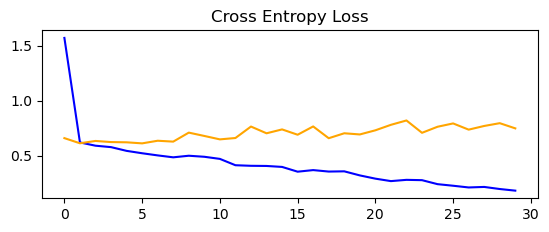

In [223]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')

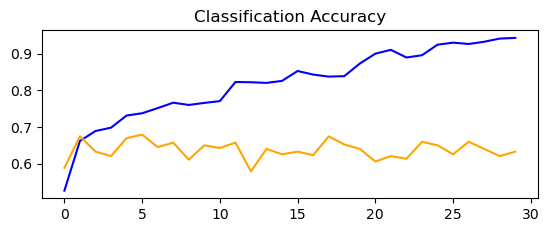

In [227]:
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['acc'], color='blue', label='train')
plt.plot(history.history['val_acc'], color='orange', label='val')

In [228]:
filename = sys.argv[0].split('/')[-1]
plt.savefig(filename + '_plot.png')
plt.close()

In [229]:
y_pred = model.predict(test)
y_test = test.classes


4/4 [==============================] - 32s 7s/step


In [230]:
#print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred))

threshold = 0.5
pred = (y_pred > threshold).astype(int)

accuracy = (pred == y_test).mean()

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 50.00%


In [30]:
def define_cnn_model():
    model_cnn = keras.Sequential()
    model_cnn.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
    model_cnn.add(keras.layers.MaxPool2D(2,2))
    model_cnn.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
    model_cnn.add(keras.layers.MaxPool2D(2,2))

    model_cnn.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
    model_cnn.add(keras.layers.MaxPool2D(2,2))

    model_cnn.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
    model_cnn.add(keras.layers.MaxPool2D(2,2))

    model_cnn.add(keras.layers.Flatten())

    model_cnn.add(keras.layers.Dense(512,activation='relu'))

    model_cnn.add(keras.layers.Dense(1,activation='sigmoid'))
    model_cnn.compile(loss='binary_crossentropy',optimizer=Adam(0.0002), metrics=['acc'])
    return model_cnn
 

model_cnn = define_cnn_model()

In [ ]:
hist2 = model_cnn.fit(train,
         steps_per_epoch = 25,
         epochs = 30,
         validation_data = val)

model_cnn.save('final2_model.h5')
_, acc = model_cnn.evaluate(val, steps=len(val), verbose=0)
print('> %.3f' % (acc * 100.0))


Epoch 1/30
25/25 [==============================] - 57s 2s/step - loss: 0.6932 - acc: 0.5255 - val_loss: 0.6913 - val_acc: 0.5232
Epoch 2/30
25/25 [==============================] - 55s 2s/step - loss: 0.6898 - acc: 0.5364 - val_loss: 0.6827 - val_acc: 0.5697
Epoch 3/30
25/25 [==============================] - 55s 2s/step - loss: 0.6772 - acc: 0.5975 - val_loss: 0.6645 - val_acc: 0.6064
Epoch 4/30
25/25 [==============================] - 57s 2s/step - loss: 0.6748 - acc: 0.5765 - val_loss: 0.6634 - val_acc: 0.6186
Epoch 5/30
25/25 [==============================] - 61s 2s/step - loss: 0.6650 - acc: 0.6142 - val_loss: 0.6595 - val_acc: 0.5892
Epoch 6/30
25/25 [==============================] - 58s 2s/step - loss: 0.6700 - acc: 0.5989 - val_loss: 0.6503 - val_acc: 0.6235
Epoch 7/30
 6/25 [======>.......................] - ETA: 37s - loss: 0.6668 - acc: 0.5911

In [ ]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(hist2.history['loss'], color='blue', label='train')
plt.plot(hist2.history['val_loss'], color='orange', label='val')

In [ ]:
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(hist2.history['acc'], color='blue', label='train')
plt.plot(hist2.history['val_acc'], color='orange', label='val')

In [11]:
y_pred2 = model_cnn.predict(test)
y_test2 = test.classes

4/4 [==============================] - 6s 1s/step


In [17]:
#import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, roc_auc_score

from keras_vggface.vggface import VGGFace
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout

from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator

In [18]:
vgg_model = VGGFace(include_top=False, input_shape = (224,224,3))

last_layer = vgg_model.get_layer('pool5').output
flat_layer = Flatten(name='flatten')(last_layer)
fc1 = Dense(2048, activation='relu', name='fc1')(flat_layer)
dense2 = Dense(1, activation='sigmoid', name='dense2')(fc1)

custom_vgg_model = Model(vgg_model.input, dense2)
custom_vgg_model.summary()

58909280/58909280 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                              

In [19]:
custom_vgg_model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(0.0002), 
    metrics=['acc']
)

In [ ]:
hist2 = custom_vgg_model.fit(train,
         steps_per_epoch = 25,
         epochs = 10,
         validation_data = val)

model_cnn.save('final3_model.h5')
_, acc = custom_vgg_model.evaluate(val, steps=len(val), verbose=0)
print('> %.3f' % (acc * 100.0))


In [ ]:
custom_vgg_model.save('vggface_v1.h5')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
y_pred = custom_vgg_model.predict(real_test)
y_test = real_test.classes

In [ ]:
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

#print()
#print(metrics.classification_report(y_test, y_pred > 0.5))